<a href="https://colab.research.google.com/github/Nguyh3/HannaN/blob/main/project.basic.stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

Create code cells below, read in your dataset to accomplish 4 python tasks:

1. Print out the basic statistics of the data. For numeric data, this should include the mean, median, mode, range, standard deviation, and interquartile (25%, 50%, 75%) range. For categorical data, it should include the number of unique values.
2. For each variable, indicate the number of missing values.
3. Choose two variables. Calculate the skew and kurtosis for each of these variables.
4. Choose two variables. Represent one variable in a histogram. In the other, filter it to represent multiple box plots.

Below your statistics, explain what information you can extract about your dataset from the statistics you have calculated.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/CO2 Emissions_Canada.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
for col in df.columns:
  if not pd.api.types.is_numeric_dtype(df[col]):
    print(col)
    print(f"\tnum uniques: {df[col].nunique()}")
  else:
    print(f"{col} == numeric")
    print(f"")

Make
	num uniques: 42
Model
	num uniques: 2053
Vehicle Class
	num uniques: 16
Engine Size(L) == numeric

Cylinders == numeric

Transmission
	num uniques: 27
Fuel Type
	num uniques: 5
Fuel Consumption City (L/100 km) == numeric

Fuel Consumption Hwy (L/100 km) == numeric

Fuel Consumption Comb (L/100 km) == numeric

Fuel Consumption Comb (mpg) == numeric

CO2 Emissions(g/km) == numeric



In [7]:
missing = df.isnull().sum()
print(missing)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [13]:
from scipy.stats import skew, kurtosis

mpg_fuel_skew = skew(df["Fuel Consumption Comb (mpg)"])
mpg_fuel_kurt = kurtosis(df["Fuel Consumption Comb (mpg)"])

co2_skew = skew(df["CO2 Emissions(g/km)"])
co2_kurt = kurtosis(df["CO2 Emissions(g/km)"])

print(f"MPG fuel skew: {mpg_fuel_skew}")
print(f"MPG fuel kurtosis: {mpg_fuel_kurt}")
print(f"CO2 emissions skew: {co2_skew}")
print(f"CO2 emissions kurtosis: {co2_kurt}")

MPG fuel skew: 0.9768356000735062
MPG fuel kurtosis: 2.49686481562013
CO2 emissions skew: 0.5259869435378954
CO2 emissions kurtosis: 0.4776643928905786


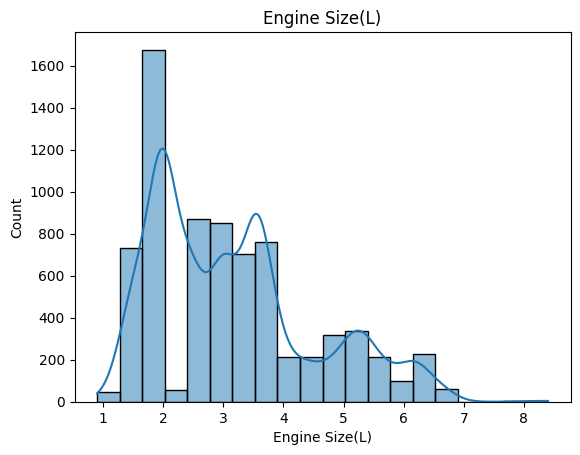

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Engine Size(L)"], kde=True, bins=20)
plt.title("Engine Size(L)")
plt.xlabel("Engine Size(L)")
plt.show()

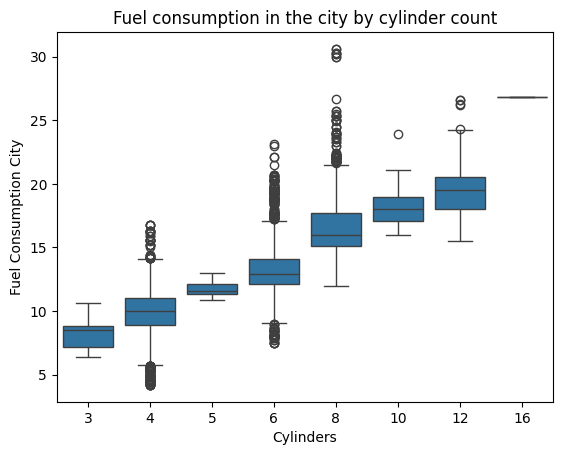

In [19]:
sns.boxplot(data=df, x="Cylinders", y= "Fuel Consumption City (L/100 km)")
plt.title("Fuel consumption in the city by cylinder count")
plt.xlabel("Cylinders")
plt.ylabel("Fuel Consumption City")
plt.show()

Based on the histogram, the data for engine sizes is right skewed, which means the majority of engine sizes are small.

The boxplot shows a large amount of outliers, especially for 4, 6, and 8 cylinders. 4-cylinder engines are typical for small or high performance cars, which can have higher CO2 emissions especially in the city area. The 8-cyliinder vehicles could be for trucks or SUVs.

The skewness for MPG fuel is 0.9, which is close to 1 and indicates a right skewed distribution. So most vehicles may have a lower MPG. The kurtosis is 2.4 which may indicate wider spread of data.

The skewness for CO2 emissions is 0.5, which is not as skewed to the right as MPG. So it could indicate lower emissions. The kurtosis is 0.4 which means a fewer outliers.